# Linear Regrssion Model to Predict Service Times 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder


In [ ]:
df_rss_rgg = pd.read_excel('RGG_RSS_final.xlsx')
df_rss_rgg['Neighborhood'].value_counts()


Pacific Heights       2627
Marina                1280
Russian Hill          1145
Downtown              1057
Outer Richmond         811
Inner Richmond         597
Financial District     587
Ocean View             557
North Beach            540
Western Addition       397
Nob Hill               322
Noe Valley             319
Visitation Valley      318
Haight Ashbury         241
Potrero Hill           231
SOMA                   207
Tresure Island         206
Outer Sunset           199
Chinatown              176
Presidio               176
Excelsior              164
West Twin Peaks        158
Parkside               104
Mission                102
Visitacion Valley       87
Presidio Heights        68
Lakeshore               46
Inner Sunset            45
Bernal Heights          32
Downton                 27
Name: Neighborhood, dtype: int64

# Train the model with neighborhood information included 

In [ ]:
dum_df_with_neighborhood=pd.get_dummies(train_with_neighborhood,columns=['Commodity','Inside/Curb','Company','Day','Code', 'Vehicle Type','Neighborhood','Meandor'])


In [ ]:
mode_tipper=dum_df_with_neighborhood['Tipper'].mode()[0]
dum_df_with_neighborhood['Tipper'].replace('na',mode_tipper,inplace=True)
dum_df_with_neighborhood['Tipper'].replace('nan',mode_tipper,inplace=True)
dum_df_with_neighborhood['Tipper'].fillna(mode_tipper,inplace=True)
dum_df_with_neighborhood.fillna(0,inplace=True)

In [ ]:
X_neighborhood=dum_df_with_neighborhood[['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Tipper', '#Units',
        'Outlier', 'Commodity_Compost', 'Commodity_Garbage',
       'Commodity_Garbage/Compost', 'Commodity_Garbage/Recycle',
       'Commodity_Recycle', 'Inside/Curb_C', 'Inside/Curb_CL', 'Inside/Curb_I',
       'Inside/Curb_IC', 'Company_RGG', 'Company_RSS', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_na', 'Code_AAKEY',
       'Code_AOKEY', 'Code_ARKEY', 'Code_ARNOK', 'Code_CCKEY', 'Code_COKEY',
       'Code_CRKEY', 'Code_LDKNC', 'Code_LSKEY', 'Code_RORKY', 'Code_RRKEY',
       'Code_RSKEY', 'Code_TCKEY', 'Vehicle Type_F-HEIL', 'Vehicle Type_HEIL',
       'Vehicle Type_LABRI', 'Vehicle Type_LODAL', 'Vehicle Type_R-HEIL',
       'Vehicle Type_R-LAB', 'Vehicle Type_S-HEIL', 'Vehicle Type_S-LODAL',
       'Vehicle Type_na', 'Neighborhood_Bernal Heights',
       'Neighborhood_Chinatown/Financial District',
       'Neighborhood_Downtown/Civic Center',
       'Neighborhood_Downtown/Civic Center/Treasure Island',
       'Neighborhood_Excelsior', 'Neighborhood_Financial District',
       'Neighborhood_Financial District/Chinatown',
       'Neighborhood_Financial District/Downtown/Civic Center',
       'Neighborhood_Glen Park/Diamond Heights/Noe Valley',
       'Neighborhood_Haight Ashbury', 'Neighborhood_Inner Richmond',
       'Neighborhood_Inner Richmond/Presidio Heights/Haight Ashbury/Western Addition',
       'Neighborhood_Inner Sunset', 'Neighborhood_Lakeshore',
       'Neighborhood_Marina', 'Neighborhood_Mission', 'Neighborhood_Nob Hill',
       'Neighborhood_Nob Hill/ Downtown/Civic Center',
       'Neighborhood_Noe Valley',
       'Neighborhood_Noe Valley/Castro/Upper Market',
       'Neighborhood_North Beach', 'Neighborhood_Ocean View',
       'Neighborhood_Ocean View/Outer Mission/Excelsior/Crocker Amazon/Bernal Heights',
       'Neighborhood_Outer Richmond',
       'Neighborhood_Outer Richmond/Inner Richmond',
       'Neighborhood_Outer Sunset', 'Neighborhood_Pacific Heights',
       'Neighborhood_Pacific Heights ', 'Neighborhood_Pacific Heights/Marina',
       'Neighborhood_Pacific Heights/Western Addition/Downtown/Civic Center',
       'Neighborhood_Parkside/West of Twin Peaks/Lakeshore/Ocean View',
       'Neighborhood_Potrero Hill', 'Neighborhood_Presidio',
       'Neighborhood_Presidio Heights ',
       'Neighborhood_Presidio/Marina/North Beach/SOMA/Downtown',
       'Neighborhood_Presidio/Marina/Pacific Heights/Downtown/SOMA',
       'Neighborhood_Presidio/Marina/Pacific Heights/Downtown/Treasure Island',
       'Neighborhood_Russian Hill', 'Neighborhood_Russian Hill/Nob Hill',
       'Neighborhood_Russian Hill/Nob Hill/North Beach/Chinatown/Financial District/Downtown/SOMA',
       'Neighborhood_Russian Hill/North Beach',
       'Neighborhood_SOMA/Downtown/Civic Center',
       'Neighborhood_SOMA/Financial District', 'Neighborhood_Tresure Island',
       'Neighborhood_Visitacion Valley', 'Neighborhood_Visitation Valley ',
       'Neighborhood_West Twin Peaks', 'Neighborhood_Western Addition',
       'Neighborhood_Western Addition/Downtown/Civic Center', 'Meandor_No',
       'Meandor_Yes']]
y_neighborhood=dum_df['Time']

In [ ]:
X_train_with_neighborhood, X_validation_with_neighborhood, y_train_with_neighborhood, y_validation_with_neighborhood = train_test_split(X_neighborhood, y_neighborhood, test_size = 0.2, random_state=16)

/root/venv/lib/python3.7/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


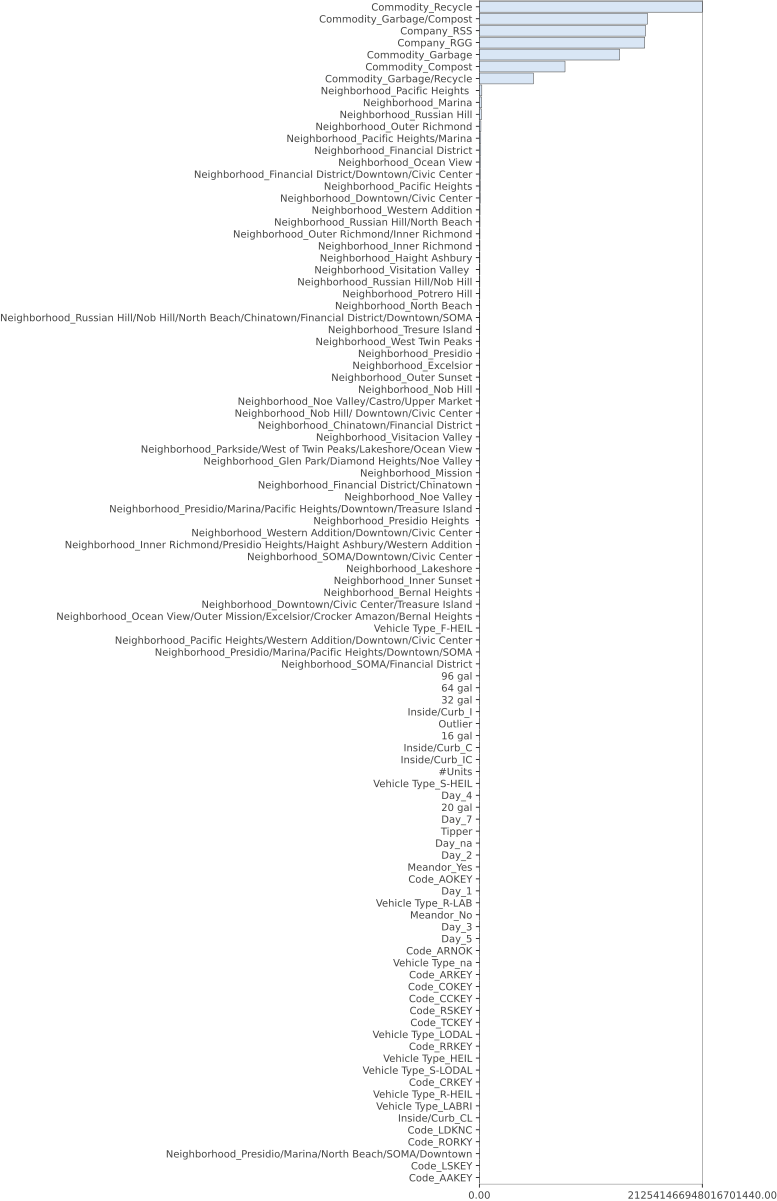

In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train_with_neighborhood, y_train_with_neighborhood)
I_with_neighborhood = importances(lm, X_train_with_neighborhood, y_train_with_neighborhood)
plot_importances(I_with_neighborhood)

In [ ]:
I_with_neighborhood.sort_values(['Importance'],ascending=False)

,Importance
Feature,
Commodity_Recycle,2.125415e+20
Commodity_Garbage/Compost,1.602976e+20
Company_RSS,1.583859e+20
Company_RGG,1.576660e+20
Commodity_Garbage,1.337299e+20
...,...
Code_LDKNC,2.042478e-06
Code_RORKY,0.000000e+00
Neighborhood_Presidio/Marina/North Beach/SOMA/Downtown,0.000000e+00


In [ ]:
lm = LinearRegression()
lm.fit(X_train_with_neighborhood, y_train_with_neighborhood)

y_pred_with_neighborhood = lm.predict(X_validation_with_neighborhood)
mse = mean_squared_error(y_validation_with_neighborhood, y_pred_with_neighborhood)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*lm.score(X_validation_with_neighborhood, y_validation_with_neighborhood):.0f}%")


mean squared error: 1,767.68, Accuracy 71%


## Running without neighborhoods

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


train_without_neigh=rgg_rss_data[['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Meandor', 'Tipper', 'Day',
       '#Units', 'Time', 'Company', 'Outlier',
        'Code']]
dum_df_without_neigh=pd.get_dummies(train_without_neigh,columns=['Commodity','Inside/Curb','Company','Day','Code', 'Vehicle Type','Meandor'])
#commodity_dum_df=pd.get_dummies(commodity_dum_df,columns=['Inside/Curb'],prefix=["Type_is"])


In [ ]:
dum_df_without_neigh.columns

Index(['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Tipper', '#Units',
       'Time', 'Outlier', 'Commodity_Compost', 'Commodity_Garbage',
       'Commodity_Garbage/Compost', 'Commodity_Garbage/Recycle',
       'Commodity_Recycle', 'Inside/Curb_C', 'Inside/Curb_CL', 'Inside/Curb_I',
       'Inside/Curb_IC', 'Company_RGG', 'Company_RSS', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_na', 'Code_AAKEY',
       'Code_AOKEY', 'Code_ARKEY', 'Code_ARNOK', 'Code_CCKEY', 'Code_COKEY',
       'Code_CRKEY', 'Code_LDKNC', 'Code_LSKEY', 'Code_RORKY', 'Code_RRKEY',
       'Code_RSKEY', 'Code_TCKEY', 'Vehicle Type_F-HEIL', 'Vehicle Type_HEIL',
       'Vehicle Type_LABRI', 'Vehicle Type_LODAL', 'Vehicle Type_R-HEIL',
       'Vehicle Type_R-LAB', 'Vehicle Type_S-HEIL', 'Vehicle Type_S-LODAL',
       'Vehicle Type_na', 'Meandor_No', 'Meandor_Yes'],
      dtype='object')

In [ ]:
mode_tipper_without_neigh=dum_df_without_neigh['Tipper'].mode()[0]
dum_df_without_neigh['Tipper'].replace('na',mode_tipper_without_neigh,inplace=True)
dum_df_without_neigh['Tipper'].replace('nan',mode_tipper_without_neigh,inplace=True)
dum_df_without_neigh['Tipper'].fillna(mode_tipper_without_neigh,inplace=True)
dum_df_without_neigh.fillna(0,inplace=True)

In [ ]:
X_without_neigh=dum_df_without_neigh[['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Tipper', '#Units',
        'Outlier', 'Commodity_Compost', 'Commodity_Garbage',
       'Commodity_Garbage/Compost', 'Commodity_Garbage/Recycle',
       'Commodity_Recycle', 'Inside/Curb_C', 'Inside/Curb_CL', 'Inside/Curb_I',
       'Inside/Curb_IC', 'Company_RGG', 'Company_RSS', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_na', 'Code_AAKEY',
       'Code_AOKEY', 'Code_ARKEY', 'Code_ARNOK', 'Code_CCKEY', 'Code_COKEY',
       'Code_CRKEY', 'Code_LDKNC', 'Code_LSKEY', 'Code_RORKY', 'Code_RRKEY',
       'Code_RSKEY', 'Code_TCKEY', 'Vehicle Type_F-HEIL', 'Vehicle Type_HEIL',
       'Vehicle Type_LABRI', 'Vehicle Type_LODAL', 'Vehicle Type_R-HEIL',
       'Vehicle Type_R-LAB', 'Vehicle Type_S-HEIL', 'Vehicle Type_S-LODAL',
       'Vehicle Type_na', 'Meandor_No', 'Meandor_Yes']]
y_without_neigh=dum_df_without_neigh['Time']

In [ ]:
X_train_without_neigh, X_validation_without_neigh, y_train_without_neigh, y_validation_without_neigh = train_test_split(X_without_neigh, y_without_neigh, test_size = 0.2, random_state=16)

In [ ]:
X_train_without_neigh

,16 gal,20 gal,32 gal,64 gal,96 gal,Tipper,#Units,Outlier,Commodity_Compost,Commodity_Garbage,...,Vehicle Type_HEIL,Vehicle Type_LABRI,Vehicle Type_LODAL,Vehicle Type_R-HEIL,Vehicle Type_R-LAB,Vehicle Type_S-HEIL,Vehicle Type_S-LODAL,Vehicle Type_na,Meandor_No,Meandor_Yes
10051,0.0,0,0.0,0.0,2,2.0,2.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
937,0.0,0,0.0,1.0,2,2.0,3.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12813,0.0,0,2.0,0.0,0,1.0,2.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
11790,0.0,0,1.0,0.0,4,2.0,5.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4808,0.0,1,1.0,0.0,0,2.0,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0,3.0,0.0,0,2.0,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1345,1.0,0,3.0,0.0,0,2.0,4.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
581,0.0,1,1.0,0.0,0,2.0,2.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2169,0.0,0,1.0,0.0,1,2.0,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


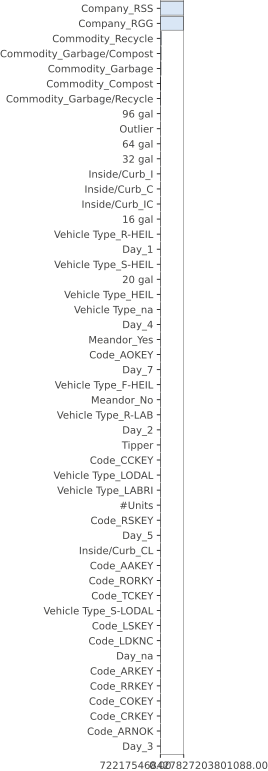

In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train_without_neigh, y_train_without_neigh)
I = importances(lm, X_train_without_neigh, y_train_without_neigh)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
Company_RSS,7.221755e+23
Company_RGG,7.149471e+23
Commodity_Recycle,3.401971e+22
Commodity_Garbage/Compost,2.538868e+22
Commodity_Garbage,2.171769e+22
Commodity_Compost,1.347898e+22
Commodity_Garbage/Recycle,7.370004e+21
96 gal,5.261853e-01
Outlier,1.791189e-01


In [ ]:
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              HuberRegressor(), 
              SGDRegressor(),
              ARDRegression(),
              TweedieRegressor()]

for algo in algorithms:
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe.fit(X_train_without_neigh, y_train_without_neigh)
    y_pred_without_neigh = pipe.predict(X_validation_without_neigh)
    mse = mean_squared_error(y_validation_without_neigh, y_pred_without_neigh)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}, Accuracy {100*pipe.score(X_validation, y_validation):.0f}%")


LinearRegression  - mean squared error: 1,861.54, Accuracy 70%
Lasso             - mean squared error: 1,867.16, Accuracy 70%
Ridge             - mean squared error: 1,862.32, Accuracy 70%
HuberRegressor    - mean squared error: 1,900.98, Accuracy 69%
SGDRegressor      - mean squared error: 1,295,396,665.02, Accuracy -20923607%
ARDRegression     - mean squared error: 1,860.43, Accuracy 70%
TweedieRegressor  - mean squared error: 2,278.70, Accuracy 63%


### Oversampling the Inside/Curb Data

In [ ]:
data_I = rgg_rss_data.loc[(rgg_rss_data['Inside/Curb']=='CL')]
data_CL=rgg_rss_data.loc[(rgg_rss_data['Inside/Curb']=='I')&(rgg_rss_data['Neighborhood'].notna())].sample(56)
data_IC=rgg_rss_data.loc[(rgg_rss_data['Inside/Curb']=='IC')&(rgg_rss_data['Neighborhood'].notna())].sample(56)
data_C=rgg_rss_data.loc[(rgg_rss_data['Inside/Curb']=='C')&(rgg_rss_data['Neighborhood'].notna())].sample(56)
mini_data=data_CL.append(data_I).append(data_IC).append(data_C)


In [ ]:
data= mini_data
data

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company,Outlier,Truck,Neighborhood
1852,Garbage,HEIL,I,0.0,0,0.0,0.0,1,NaN,100,2,NaN,5,1.0,179.0,RSS,0,NaN,Western Addition
8173,Garbage/Compost,NaN,I,0.0,0,0.0,0.0,2,NaN,238,2,0,3,2.0,143.0,RGG,0,SL,Financial District
12510,Garbage/Compost,S-HEIL,I,0.0,0,0.0,1.0,1,No,232,2,0,2,2.0,114.0,RGG,0,SL,Russian Hill
1886,Garbage,HEIL,I,0.0,0,0.0,1.0,2,NaN,100,2,NaN,5,3.0,190.0,RSS,0,NaN,Western Addition
11097,Garbage/Compost,NaN,I,0.0,0,0.0,0.0,3,Yes,207,2,0,3,3.0,201.0,RGG,0,SL,Marina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,Garbage/Compost,S-HEIL,C,0.0,0,0.0,1.0,2,No,215,4,0,4,3.0,90.0,RGG,0,SL,Pacific Heights
8341,Garbage/Compost,S-HEIL,C,0.0,0,0.0,1.0,0,No,215,4,0,4,1.0,53.0,RGG,0,SL,Pacific Heights
1054,Garbage,HEIL,C,1.0,0,1.0,0.0,0,NaN,65,2,NaN,3,2.0,27.0,RSS,0,NaN,West Twin Peaks
1543,Garbage,na,C,1.0,0,3.0,0.0,0,NaN,36,2,NaN,1,4.0,72.0,RSS,0,NaN,Ocean View


In [ ]:
train=data[['Commodity', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Route', 'Neighborhood', 'Truck',
       'Tipper', 'Key Code?', 'Day', '#Units', 'Company','Time']]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

#data['Commodity_ohe']=LabelEncoder().fit_transform(X['Commodity'])
#data['Commodity_ohe']
#commodity_enc_df = pd.DataFrame(enc.fit_transform(data[['Commodity_ohe']]).toarray())


dum_df=pd.get_dummies(train,columns=['Commodity','Inside/Curb','Company','Day','Key Code?', 'Truck','Neighborhood'])
#commodity_dum_df=pd.get_dummies(commodity_dum_df,columns=['Inside/Curb'],prefix=["Type_is"])


In [ ]:
dum_df

,16 gal,20 gal,32 gal,64 gal,96 gal,Route,Tipper,#Units,Time,Commodity_Compost,...,Neighborhood_Outer Sunset,Neighborhood_Pacific Heights,Neighborhood_Potrero Hill,Neighborhood_Presidio,Neighborhood_Presidio Heights,Neighborhood_Russian Hill,Neighborhood_Tresure Island,Neighborhood_Visitation Valley,Neighborhood_West Twin Peaks,Neighborhood_Western Addition
1852,0.0,0,0.0,0.0,1,100,2,1.0,179.0,0,...,0,0,0,0,0,0,0,0,0,1
8173,0.0,0,0.0,0.0,2,238,2,2.0,143.0,0,...,0,0,0,0,0,0,0,0,0,0
12510,0.0,0,0.0,1.0,1,232,2,2.0,114.0,0,...,0,0,0,0,0,1,0,0,0,0
1886,0.0,0,0.0,1.0,2,100,2,3.0,190.0,0,...,0,0,0,0,0,0,0,0,0,1
11097,0.0,0,0.0,0.0,3,207,2,3.0,201.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,0.0,0,0.0,1.0,2,215,4,3.0,90.0,0,...,0,1,0,0,0,0,0,0,0,0
8341,0.0,0,0.0,1.0,0,215,4,1.0,53.0,0,...,0,1,0,0,0,0,0,0,0,0
1054,1.0,0,1.0,0.0,0,65,2,2.0,27.0,0,...,0,0,0,0,0,0,0,0,1,0
1543,1.0,0,3.0,0.0,0,36,2,4.0,72.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dum_df.columns

Index(['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Meandor', 'Tipper',
       '#Units', 'Time', 'Outlier', 'Truck', 'Commodity_Compost',
       'Commodity_Garbage', 'Commodity_Garbage/Compost',
       'Commodity_Garbage/Recycle', 'Commodity_Recycle', 'Inside/Curb_C',
       'Inside/Curb_CL', 'Inside/Curb_I', 'Inside/Curb_IC', 'Company_RGG',
       'Company_RSS', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_7',
       'Day_na', 'Code_AAKEY', 'Code_AOKEY', 'Code_ARKEY', 'Code_ARNOK',
       'Code_CCKEY', 'Code_COKEY', 'Code_CRKEY', 'Code_LDKNC', 'Code_LSKEY',
       'Code_RORKY', 'Code_RRKEY', 'Code_RSKEY', 'Code_TCKEY',
       'Vehicle Type_F-HEIL', 'Vehicle Type_HEIL', 'Vehicle Type_LABRI',
       'Vehicle Type_LODAL', 'Vehicle Type_R-HEIL', 'Vehicle Type_R-LAB',
       'Vehicle Type_S-HEIL', 'Vehicle Type_S-LODAL', 'Vehicle Type_na',
       'Neighborhood_Bernal Heights',
       'Neighborhood_Chinatown/Financial District',
       'Neighborhood_Downtown/Civic Center',
      

In [ ]:
mode_tipper=dum_df['Tipper'].mode()[0]
dum_df['Tipper'].replace('na',mode_tipper,inplace=True)
dum_df['Tipper'].replace('nan',mode_tipper,inplace=True)
dum_df['Tipper'].fillna(mode_tipper,inplace=True)
dum_df.fillna(0,inplace=True)

In [ ]:
X=dum_df[['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Meandor', 'Tipper',
       '#Units', 'Time', 'Outlier', 'Truck', 'Commodity_Compost',
       'Commodity_Garbage', 'Commodity_Garbage/Compost',
       'Commodity_Garbage/Recycle', 'Commodity_Recycle', 'Inside/Curb_C',
       'Inside/Curb_CL', 'Inside/Curb_I', 'Inside/Curb_IC', 'Company_RGG',
       'Company_RSS', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_7',
       'Day_na', 'Code_AAKEY', 'Code_AOKEY', 'Code_ARKEY', 'Code_ARNOK',
       'Code_CCKEY', 'Code_COKEY', 'Code_CRKEY', 'Code_LDKNC', 'Code_LSKEY',
       'Code_RORKY', 'Code_RRKEY', 'Code_RSKEY', 'Code_TCKEY',
       'Vehicle Type_F-HEIL', 'Vehicle Type_HEIL', 'Vehicle Type_LABRI',
       'Vehicle Type_LODAL', 'Vehicle Type_R-HEIL', 'Vehicle Type_R-LAB',
       'Vehicle Type_S-HEIL', 'Vehicle Type_S-LODAL', 'Vehicle Type_na',
       'Neighborhood_Bernal Heights',
       'Neighborhood_Chinatown/Financial District',
       'Neighborhood_Downtown/Civic Center',
       'Neighborhood_Downtown/Civic Center/Treasure Island',
       'Neighborhood_Excelsior', 'Neighborhood_Financial District',
       'Neighborhood_Financial District/Chinatown',
       'Neighborhood_Financial District/Downtown/Civic Center',
       'Neighborhood_Glen Park/Diamond Heights/Noe Valley',
       'Neighborhood_Haight Ashbury', 'Neighborhood_Inner Richmond',
       'Neighborhood_Inner Richmond/Presidio Heights/Haight Ashbury/Western Addition',
       'Neighborhood_Inner Sunset', 'Neighborhood_Lakeshore',
       'Neighborhood_Marina', 'Neighborhood_Mission', 'Neighborhood_Nob Hill',
       'Neighborhood_Nob Hill/ Downtown/Civic Center',
       'Neighborhood_Noe Valley',
       'Neighborhood_Noe Valley/Castro/Upper Market',
       'Neighborhood_North Beach', 'Neighborhood_Ocean View',
       'Neighborhood_Ocean View/Outer Mission/Excelsior/Crocker Amazon/Bernal Heights',
       'Neighborhood_Outer Richmond',
       'Neighborhood_Outer Richmond/Inner Richmond',
       'Neighborhood_Outer Sunset', 'Neighborhood_Pacific Heights',
       'Neighborhood_Pacific Heights ', 'Neighborhood_Pacific Heights/Marina',
       'Neighborhood_Pacific Heights/Western Addition/Downtown/Civic Center',
       'Neighborhood_Parkside/West of Twin Peaks/Lakeshore/Ocean View',
       'Neighborhood_Potrero Hill', 'Neighborhood_Presidio',
       'Neighborhood_Presidio Heights ',
       'Neighborhood_Presidio/Marina/North Beach/SOMA/Downtown',
       'Neighborhood_Presidio/Marina/Pacific Heights/Downtown/SOMA',
       'Neighborhood_Presidio/Marina/Pacific Heights/Downtown/Treasure Island',
       'Neighborhood_Russian Hill', 'Neighborhood_Russian Hill/Nob Hill',
       'Neighborhood_Russian Hill/Nob Hill/North Beach/Chinatown/Financial District/Downtown/SOMA',
       'Neighborhood_Russian Hill/North Beach',
       'Neighborhood_SOMA/Downtown/Civic Center',
       'Neighborhood_SOMA/Financial District', 'Neighborhood_Tresure Island',
       'Neighborhood_Visitacion Valley', 'Neighborhood_Visitation Valley ',
       'Neighborhood_West Twin Peaks', 'Neighborhood_Western Addition',
       'Neighborhood_Western Addition/Downtown/Civic Center']]
y=dum_df['Time']

In [ ]:
# Extract validation set from training set -- default is 25% will go to test

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)

In [ ]:
# !pip install rfpimp

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
X_train

,16 gal,20 gal,32 gal,64 gal,96 gal,Meandor,Tipper,#Units,Time,Outlier,...,Neighborhood_Russian Hill/Nob Hill/North Beach/Chinatown/Financial District/Downtown/SOMA,Neighborhood_Russian Hill/North Beach,Neighborhood_SOMA/Downtown/Civic Center,Neighborhood_SOMA/Financial District,Neighborhood_Tresure Island,Neighborhood_Visitacion Valley,Neighborhood_Visitation Valley,Neighborhood_West Twin Peaks,Neighborhood_Western Addition,Neighborhood_Western Addition/Downtown/Civic Center
10051,0.0,0,0.0,0.0,2,No,2.0,2.0,141.0,0,...,0,0,0,0,0,0,0,0,0,0
937,0.0,0,0.0,1.0,2,0,2.0,3.0,238.0,0,...,0,0,0,0,0,0,0,0,0,0
12813,0.0,0,2.0,0.0,0,0,1.0,2.0,121.0,0,...,0,0,0,0,0,0,0,0,0,0
11790,0.0,0,1.0,0.0,4,0,2.0,5.0,180.0,0,...,0,0,0,0,0,0,0,0,0,0
4808,0.0,1,1.0,0.0,0,No,2.0,2.0,42.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0,3.0,0.0,0,0,2.0,3.0,113.0,0,...,0,0,0,0,0,0,0,0,0,0
1345,1.0,0,3.0,0.0,0,0,2.0,4.0,79.0,0,...,0,0,0,0,0,0,1,0,0,0
581,0.0,1,1.0,0.0,0,0,2.0,2.0,27.0,0,...,0,0,0,0,0,0,0,0,0,0
2169,0.0,0,1.0,0.0,1,0,2.0,2.0,44.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train, y_train)
I = importances(lm, X_train, y_train)
plot_importances(I)

ValueError: could not convert string to float: 'No'

# Without Regularization

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# !pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=ed72049c45748ec12ff9d5e54951faa39f5b3a1c89121600c70dc1a2894c146d
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


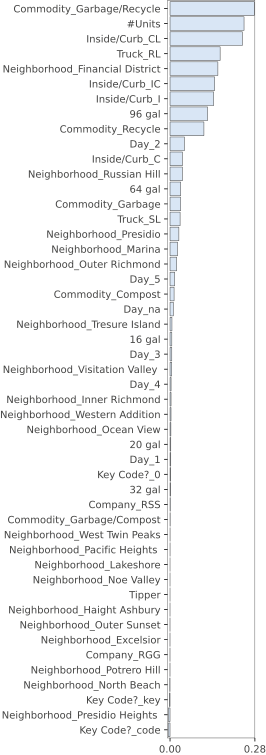

In [ ]:
from rfpimp import *
I = importances(lm, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
Commodity_Garbage/Recycle,0.275657
#Units,0.242168
Inside/Curb_CL,0.236756
Truck_RL,0.163968
Neighborhood_Financial District,0.156573
Inside/Curb_IC,0.146089
Inside/Curb_I,0.142877
96 gal,0.122937
Commodity_Recycle,0.110866


In [ ]:
print(f"Intercept:        {lm.intercept_:.2f}")
for feature_name, coef in zip(X_train.columns, lm.coef_):
    print(f"{feature_name:>3} {coef:>6,.2f}", end="\n              ")

Intercept:        19.78
16 gal   6.89
              20 gal -13.07
              32 gal  -3.88
              64 gal   8.56
              96 gal  17.74
              Tipper   0.11
              #Units  16.24
              Commodity_Compost  19.94
              Commodity_Garbage  20.58
              Commodity_Garbage/Compost   8.44
              Commodity_Garbage/Recycle -107.94
              Commodity_Recycle  58.98
              Inside/Curb_C -26.84
              Inside/Curb_CL -63.56
              Inside/Curb_I  42.72
              Inside/Curb_IC  47.68
              Company_RGG  -4.23
              Company_RSS   4.23
              Day_1  11.28
              Day_2  22.41
              Day_3  -8.58
              Day_4  -4.01
              Day_5  15.36
              Day_na -36.47
              Key Code?_0  -4.23
              Key Code?_code  25.33
              Key Code?_key   6.48
              Truck_RL  58.55
              Truck_SL  20.45
              Neighborhood_Excelsior -11.79
   

In [ ]:
# How well does our model predict? 

y_pred = lm.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean squared error: {mse:,.2f}")

Mean squared error: 6,401.25


# With Regularization

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lasso', Lasso())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

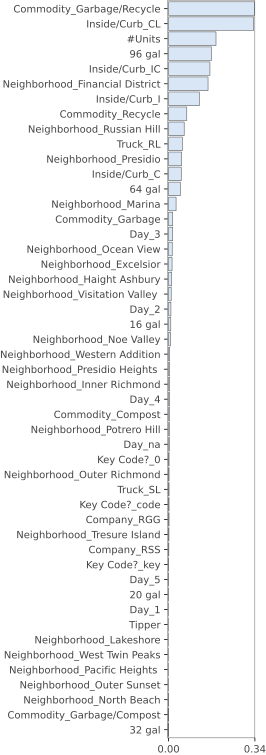

In [ ]:
I = importances(pipe, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
Commodity_Garbage/Recycle,0.341539
Inside/Curb_CL,0.338641
#Units,0.188864
96 gal,0.170698
Inside/Curb_IC,0.164727
Neighborhood_Financial District,0.157158
Inside/Curb_I,0.122575
Commodity_Recycle,0.072680
Neighborhood_Russian Hill,0.062238


In [ ]:
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              HuberRegressor(), 
              SGDRegressor(),
              ARDRegression(),
              TweedieRegressor()]

for algo in algorithms:
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}, Accuracy {100*pipe.score(X_validation, y_validation):.0f}%")


LinearRegression  - mean squared error: 6,440.18, Accuracy 77%
Lasso             - mean squared error: 6,694.13, Accuracy 76%
Ridge             - mean squared error: 6,492.45, Accuracy 77%
HuberRegressor    - mean squared error: 8,497.04, Accuracy 70%
SGDRegressor      - mean squared error: 6,607.69, Accuracy 76%
ARDRegression     - mean squared error: 6,933.87, Accuracy 75%
TweedieRegressor  - mean squared error: 12,956.61, Accuracy 54%


In [ ]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), 
                     ('lasso', Lasso())])

pipe_lasso.fit(X_train, y_train)

print(f"Intercept:        {pipe_lasso['lasso'].intercept_:.2f}")
for feature_name, coef in zip(X_train.columns, pipe_lasso['lasso'].coef_):
    print(f"{feature_name:>3} {coef:>6,.2f}", end="\n              ")


Intercept:        112.99
16 gal   4.99
              20 gal  -0.00
              32 gal  -0.00
              64 gal  14.74
              96 gal  20.34
              Tipper   0.00
              #Units  21.28
              Commodity_Compost   0.00
              Commodity_Garbage  -0.00
              Commodity_Garbage/Compost  -0.00
              Commodity_Garbage/Recycle -21.68
              Commodity_Recycle  10.48
              Inside/Curb_C -29.21
              Inside/Curb_CL -37.89
              Inside/Curb_I   0.00
              Inside/Curb_IC   3.31
              Company_RGG   0.00
              Company_RSS  -0.00
              Day_1   0.75
              Day_2   1.88
              Day_3  -4.56
              Day_4  -4.23
              Day_5   0.00
              Day_na  -0.27
              Key Code?_0   0.00
              Key Code?_code   2.25
              Key Code?_key   0.00
              Truck_RL   7.61
              Truck_SL  -0.00
              Neighborhood_Excelsior  -0.00
   

In [ ]:
pipe_lasso['lasso'].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
hyperparameters={'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), 
                     ('lasso', Lasso(**hyperparameters))])

pipe_lasso.fit(X_train, y_train)

print(f"Intercept:        {pipe_lasso['lasso'].intercept_:.2f}")
for feature_name, coef in zip(X_train.columns, pipe_lasso['lasso'].coef_):
    print(f"{feature_name:>3} {coef:>6,.2f}", end="\n              ")

Intercept:        0.00
16 gal   4.99
              20 gal  -0.00
              32 gal  -0.00
              64 gal  14.74
              96 gal  20.34
              Tipper   0.00
              #Units  21.28
              Commodity_Compost   0.00
              Commodity_Garbage  -0.00
              Commodity_Garbage/Compost  -0.00
              Commodity_Garbage/Recycle -21.68
              Commodity_Recycle  10.48
              Inside/Curb_C -29.21
              Inside/Curb_CL -37.89
              Inside/Curb_I   0.00
              Inside/Curb_IC   3.31
              Company_RGG   0.00
              Company_RSS  -0.00
              Day_1   0.75
              Day_2   1.88
              Day_3  -4.56
              Day_4  -4.23
              Day_5   0.00
              Day_na  -0.27
              Key Code?_0   0.00
              Key Code?_code   2.25
              Key Code?_key   0.00
              Truck_RL   7.61
              Truck_SL  -0.00
              Neighborhood_Excelsior  -0.00
     

In [ ]:
pipe_lasso.score(X_validation, y_validation)

0.7696543703536276

# Tune hyperparameters - Ridge 

# Tune hyperparameters - Lasso
This method is more likely to zero out coefficients 

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lasso', Lasso())])

pipe.fit(X_train, y_train)

pipe['lasso'].coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.13344782e+00,
        2.19869753e+01,  0.00000000e+00,  0.00000000e+00,  3.32906877e+01,
       -0.00000000e+00, -0.00000000e+00,  9.47398083e-01, -2.91337361e+00,
        0.00000000e+00, -1.65029028e+01, -9.49007109e-02,  1.33904034e+01,
        6.85556113e+00,  3.02825347e+00, -3.54578831e-16,  1.73108257e+00,
        6.95421071e-01,  0.00000000e+00, -1.83668764e+00, -9.25725098e-02,
       -2.31387741e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.98938214e-01,
        3.24949853e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.59809402e+00, -0.00000000e+00,  4.99031336e-01, -8.09618440e-02,
       -9.31588230e-01, -2.22087112e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.45586718e-01,  0.00000000e+00, -3.48835113e+00,
       -2.28558816e+00, -

In [ ]:
pipe['lasso'].intercept_

93.0059649122807

In [ ]:
rgg_rss_data[['Route','Neighborhood']]

,Route,Neighborhood
0,912,Outer Richmond/Inner Richmond
1,912,Outer Richmond/Inner Richmond
2,912,Outer Richmond/Inner Richmond
3,912,Outer Richmond/Inner Richmond
4,912,Outer Richmond/Inner Richmond
...,...,...
12821,302,Chinatown/Financial District
12822,302,Chinatown/Financial District
12823,302,Chinatown/Financial District
12824,302,Chinatown/Financial District


In [ ]:
flag=[]
for x in list(rgg_rss_data['Neighborhood']):
    if '/' in x:
        flag.append(1)
    else:
        flag.append(0)


In [ ]:
flag

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
rgg_rss_data[['Route','Neighborhood']]['Flag']=flag

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rgg_rss_data['Flag']=flag

In [ ]:
rgg_rss_data.loc[rgg_rss_data['Flag']==1][['Route','Neighborhood']].drop_duplicates()

,Route,Neighborhood
0,912,Outer Richmond/Inner Richmond
1889,91,Ocean View/Outer Mission/Excelsior/Crocker Ama...
2330,932,Noe Valley/Castro/Upper Market
2582,937,Glen Park/Diamond Heights/Noe Valley
2775,907,Parkside/West of Twin Peaks/Lakeshore/Ocean View
2961,944,Western Addition/Downtown/Civic Center
3228,498,Inner Richmond/Presidio Heights/Haight Ashbury...
4276,310,Financial District/Downtown/Civic Center
4554,537,SOMA/Downtown/Civic Center
4830,506,SOMA/Financial District


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>